<a href="https://colab.research.google.com/github/Clara-breado/AT_spider_v0/blob/main/text_classification_with_transformers_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

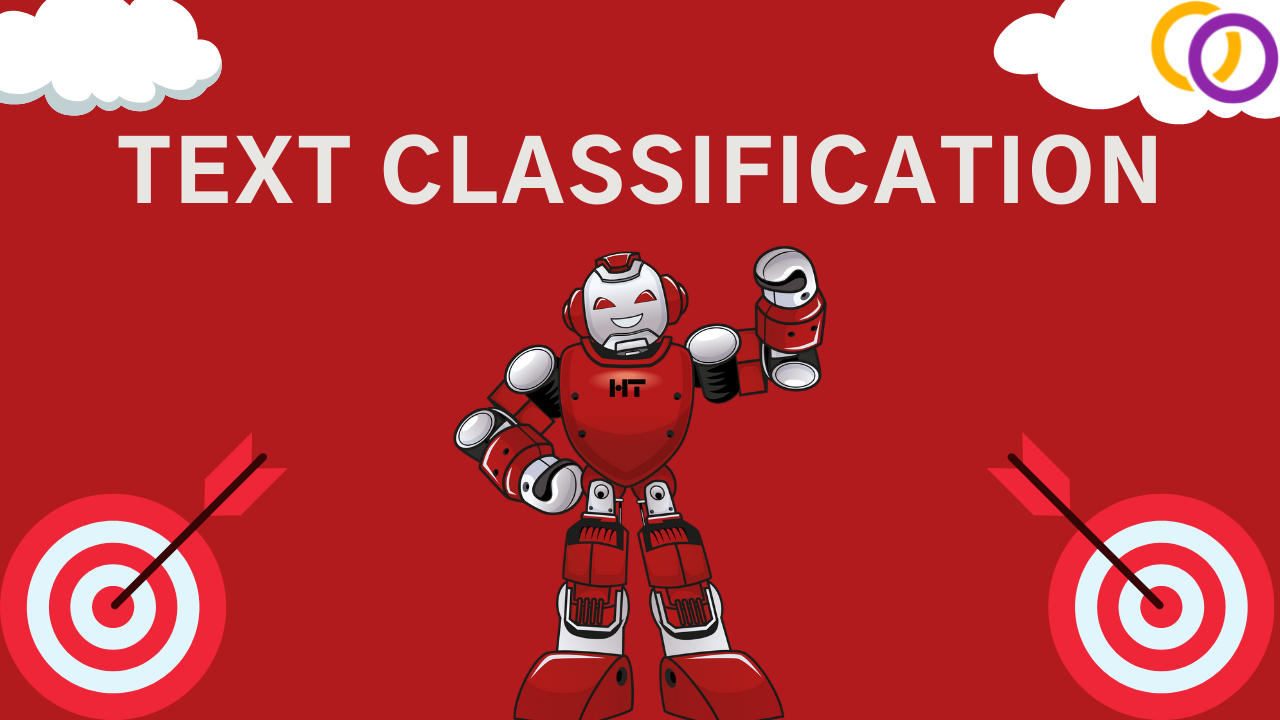

By Eric Fillion @ Vennify.ai

Article: https://www.vennify.ai/train-text-classification-transformers/

Video: https://youtu.be/KxyjRyk2Hq8



# Installation


https://happytransformer.com/

In [1]:
pip install happytransformer

     |████████████████████████████████| 44 kB 2.5 MB/s 
     |████████████████████████████████| 264 kB 22.0 MB/s 
     |████████████████████████████████| 1.2 MB 40.6 MB/s 
     |████████████████████████████████| 2.6 MB 35.8 MB/s 
     |████████████████████████████████| 243 kB 45.9 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 118 kB 49.2 MB/s 
     |████████████████████████████████| 895 kB 33.1 MB/s 
     |████████████████████████████████| 636 kB 41.9 MB/s 
     |████████████████████████████████| 3.3 MB 29.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Instantiation

In [2]:
from happytransformer import HappyTextClassification 

In [22]:
happy_tc = HappyTextClassification("gpt2", "microsoft/DialoGPT-small", num_labels=3)

Some weights of the model checkpoint at microsoft/DialoGPT-small were not used when initializing GPT2ForSequenceClassification: ['lm_head.weight']
- This IS expected if you are initializing GPT2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at microsoft/DialoGPT-small and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
08/24/2021 04:41:37 - INFO - happytransformer.happy_transformer -   Using model: cud

In [30]:
bert = HappyTextClassification("DISTILBERT", "distilbert-base-uncased",num_labels=3)

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

08/24/2021 04:43:44 - INFO - happytransformer.happy_transformer -   Using model: cuda


In [23]:
happy_tc.tokenizer.pad_token = happy_tc.tokenizer.eos_token

In [24]:
happy_tc.tokenizer

PreTrainedTokenizerFast(name_or_path='microsoft/DialoGPT-small', vocab_size=50257, model_max_len=1024, is_fast=True, padding_side='right', special_tokens={'bos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': '<|endoftext|>'})

In [25]:
happy_tc.model.config

GPT2Config {
  "_name_or_path": "microsoft/DialoGPT-small",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "resid_pdrop": 0.1,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "conversational": {
      "max_length": 1000
    }
  },
  "transformers_version": "4.9.2",
  "use_cache": true,
  "vocab_size": 50257
}

# Usage

In [26]:
result = happy_tc.classify_text("Tesla's stock just increased by 20%")

In [31]:
bert.classify_text("Tesla's stock just increased by 20%")

TextClassificationResult(label='LABEL_2', score=0.3583657145500183)

In [ ]:
bert.

In [27]:
print(result)

TextClassificationResult(label='LABEL_2', score=0.9999216198921204)


In [17]:
print(result.label)
print(result.score)

LABEL_1
0.9978518486022949


In [29]:
result = happy_tc.classify_text("The price of gold just what the hate you by 5%")
print(result.label)
print(result.score)

LABEL_2
0.9998976588249207


# Training – NLP Sentiment Analysis 

https://huggingface.co/distilbert-base-uncased



https://www.vennify.ai/train-text-classification-transformers/

In [47]:
happy_tc = HappyTextClassification("DISTILBERT", "distilbert-base-uncased", num_labels=3)

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.d423bdf2f58dc8b77d5f5d18028d7ae4a72dcfd8f468e81fe979ada957a8c361
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.9.2",
  "vocab_size": 30522
}

loading weights file https://huggingface.co/distilbert-ba

In [33]:
import csv

In [35]:
cases= [("Masterpice from the world-renowned architect Oscar Niemeyer, the museum run successive exhibits that cover a broad spectrum. The place itself and its unusual design deserves a visit. ", 0), 
        ("My whole family really enjoyed the museum. The stunning architecture, the art collections, the coffee shop, all of it. :-) We will be back periodically to see new collections as they change. It's a wonderful place to spend a weekend afternoon, with kids or without. The coffee shop has great coffee and delicious desserts.",0),
        ("This was one of the places that we went on the Petropolis tour.  We learned the history of Emperor Dom Pedro II as the founder of Petropolis.  One is not allowed to take pictures inside the museum.   Before you can tour the place, your personal stuff are put in a locker giving you the key afterwards.  Also, you have to wear over sized slippers to cover your shoes.  Be careful not to slide on the slippery floors.  You move from room to from like a duck or turtle worrying you might fall.  However, there are lot of history inside the  imperial palace like the family of Emperor Dom Pedro II,  the imperial crown, etc.", 1),
        ("One of the most beautiful beach I've ever seen. If you are there in the morning (around 9) you nearly have the whole beach for your own. In the afternoon it gets 'crowed. The food is okey, but the staff very confioused and slowley.",2),
        ("Get your guide or surf instructor to take you down to Jeribucacu, which is off the beaten track and takes a drive and then a 20 minute walk through the rainforest to get to, but it's well worth it. Praia da Tiririca is second best, with its perfect surf conditions and beach surrounded by rainforest.",2)
        ]


In [38]:
with open("train.csv", 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["text", "label"])
        for case in cases:
            writer.writerow([case[0], case[1]])

In [ ]:
result = happy_tc.classify_text("Wow I love using BERT for text classification")
print(result)

TextClassificationResult(label='LABEL_0', score=0.5396106839179993)


In [ ]:
result = happy_tc.classify_text("I hate NLP")
print(result)

TextClassificationResult(label='LABEL_0', score=0.5575699806213379)


In [48]:
happy_tc.train("train.csv")

08/24/2021 05:07:02 - INFO - happytransformer.happy_transformer -   Preprocessing dataset...
PyTorch: setting up devices
***** Running training *****
  Num examples = 5
  Num Epochs = 3
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 1
  Gradient Accumulation steps = 1
  Total optimization steps = 15


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




In [49]:
happy_tc.classify_text("The place itself and its unusual design deserves a visit.")

TextClassificationResult(label='LABEL_2', score=0.4108608663082123)

### Learning Paramters 

https://happytransformer.com/text-classification/finetuning/

In [ ]:
from happytransformer import TCTrainArgs


In [ ]:
args = TCTrainArgs(num_train_epochs=5)

In [ ]:
happy_tc.train("train.csv", args=args)

06/18/2021 00:04:04 - INFO - happytransformer.happy_transformer -   Preprocessing dataset...


Step,Training Loss


### Evaluating 

In [40]:
result = happy_tc.eval("train.csv")

08/24/2021 05:01:40 - INFO - happytransformer.happy_transformer -   Preprocessing dataset...
PyTorch: setting up devices
***** Running Evaluation *****
  Num examples = 5
  Batch size = 1


In [41]:
print(result.loss)

2.2711410522460938
